In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset
df = pd.read_csv("train.csv")  # Adjust path if needed
sns.set(style="whitegrid")


In [4]:
# Basic structure and overview
df.info()
df.describe()
df.head()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.drop(columns=['Cabin'], inplace=True)

In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_15004\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [7]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_15004\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

In [10]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [11]:
df.to_csv("titanic_cleaned.csv", index=False)

# 1] Survival Count

Text(0.5, 1.0, 'Survival Distribution')

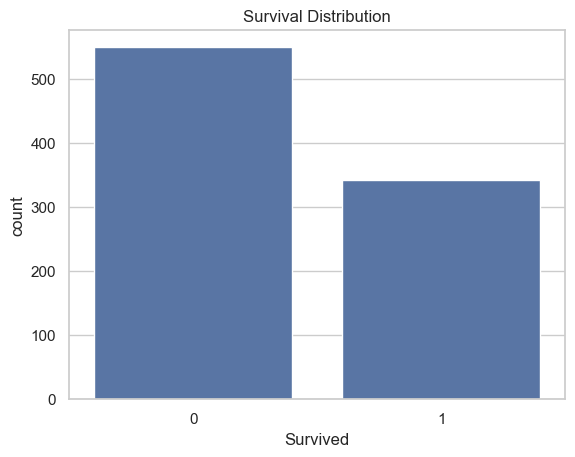

In [12]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution")

#### Number of passengers who survived (1) vs. died (0).
 
 #### Observation:
 
 About 60% died and 40% survived → Titanic had a high fatality rate

# 2] Gender Distribution

Text(0.5, 1.0, 'Gender Distribution')

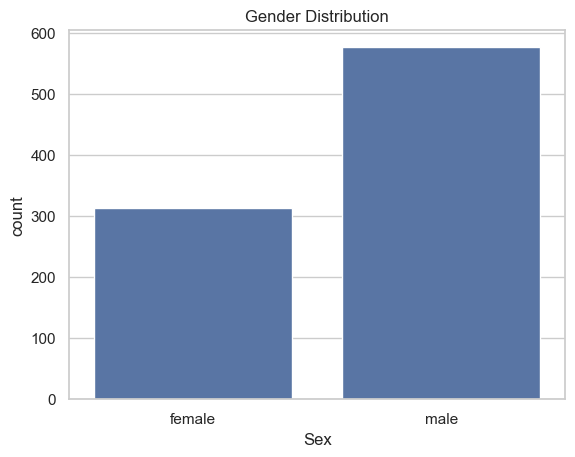

In [13]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")

#### Count of male vs. female passengers.
 
 Observation: More males than females on board.

# 3] Pclass Distribution


Text(0.5, 1.0, 'Passenger Class Distribution')

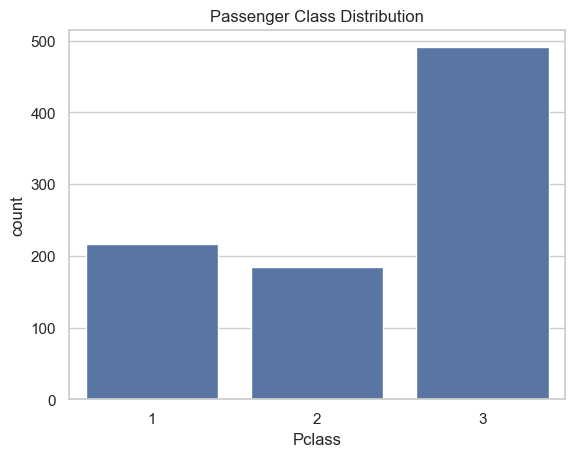

In [14]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")

#### Distribution of passengers by travel class (1st, 2nd, 3rd).
 
 Observation: Most passengers were in 3rd class, fewest in 1st.



# 4] Age Distribution

Text(0.5, 1.0, 'Age Distribution')

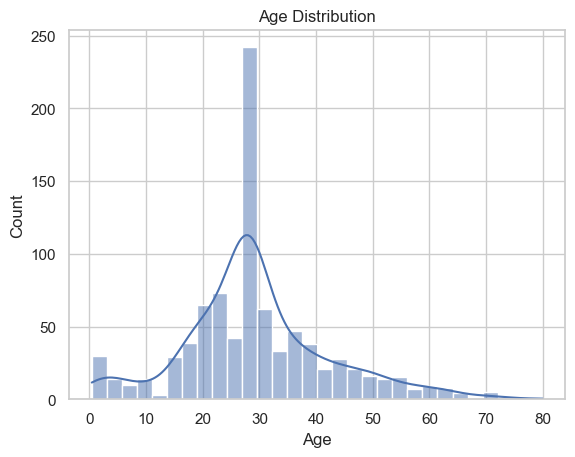

In [15]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")

#### Histogram + KDE plot of ages.

##### Observation:

Most passengers were in their 20s–30s.

Some children and elderly present.

Distribution is right-skewed (fewer older people).



# 5] Fare Distribution

Text(0.5, 1.0, 'Fare Boxplot')

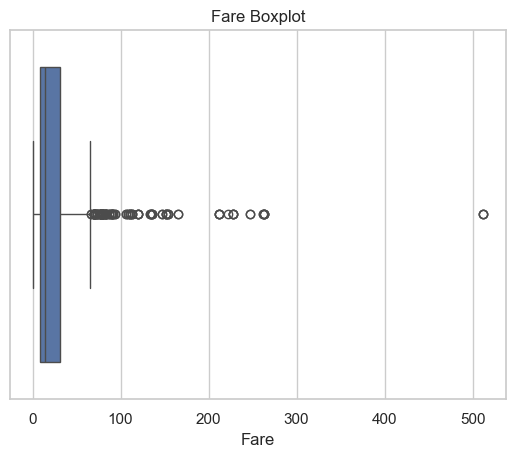

In [16]:
sns.boxplot(x='Fare', data=df)
plt.title("Fare Boxplot")

 #### Distribution of fares using a boxplot.

##### Observation:

Most fares are below $100.

Several outliers (e.g. very high 1st class fares).

# 6] Survival by Sex

Text(0.5, 1.0, 'Survival by Gender')

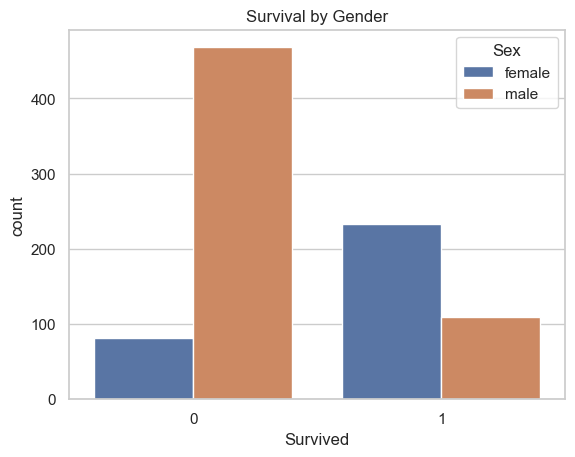

In [17]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")

### How survival rates differed by gender.

##### Observation:

More females survived.

More males died.

"Women and children first" appears to be true.

# 7] Survival by Pclass

Text(0.5, 1.0, 'Survival by Class')

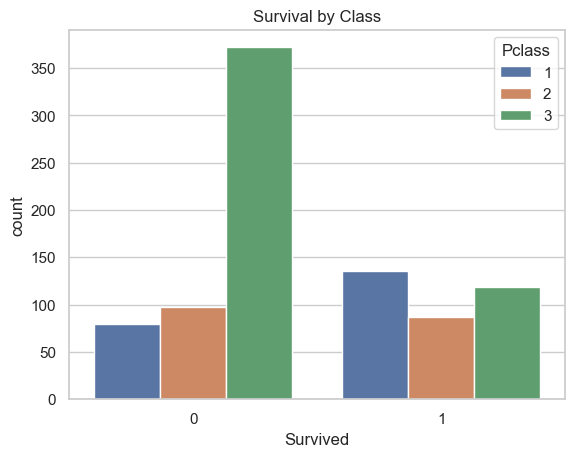

In [18]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Class")

#### Survival counts split by passenger class.

##### Observation:

1st class had the highest survival rate.

3rd class had the highest death rate.

#  8] Age vs Survival

Text(0.5, 1.0, 'Age vs Survival')

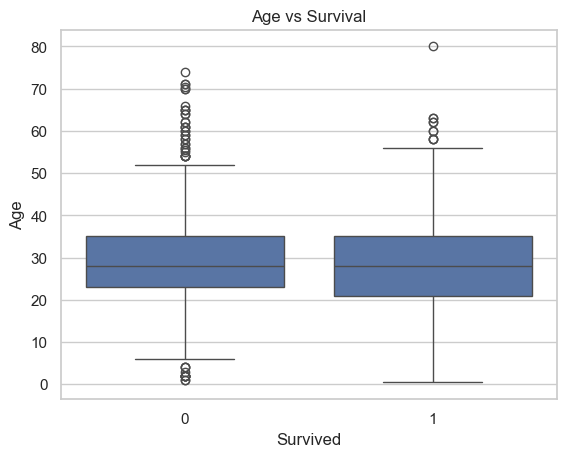

In [19]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")

#### Age distribution of survivors vs. non-survivors.

##### Observation:

Survivors slightly younger.

Some children survived more.

Older passengers mostly didn't survive.

# 9 ] Fare vs Pclass

Text(0.5, 1.0, 'Fare vs Pclass')

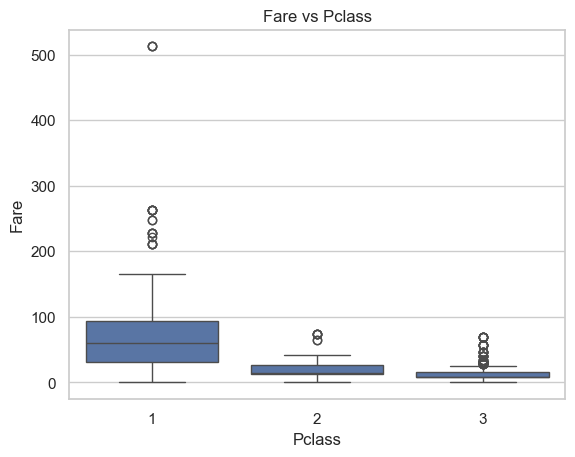

In [20]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare vs Pclass")

#### Fare distribution within each class.

##### Observation:

1st class fares are much higher.

3rd class has lowest fares.

Some high outliers in each class.



# 10] Correlation Heatmap

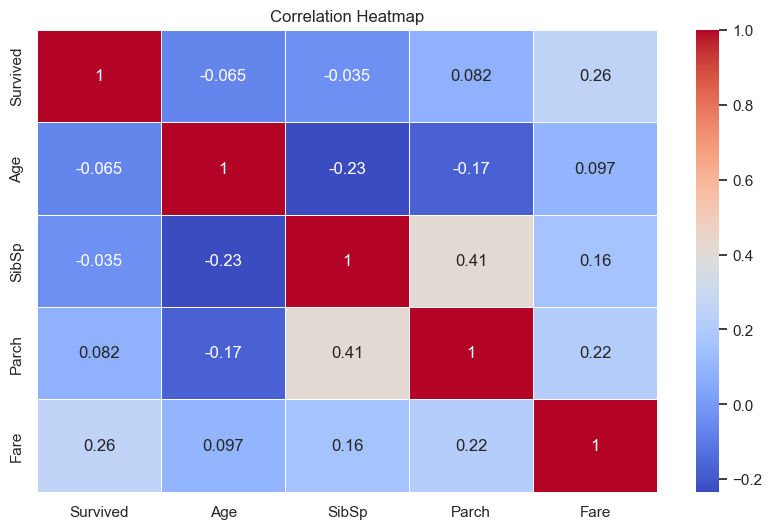

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#### Numeric features and how strongly they relate.

#### Key correlations:

Fare and Pclass: Negative correlation → lower class, lower fare.

Survived and Pclass: moderately negatively correlated.

Survived and Fare: positive correlation → higher fare, better chance of survival.



# 11] Pairplot

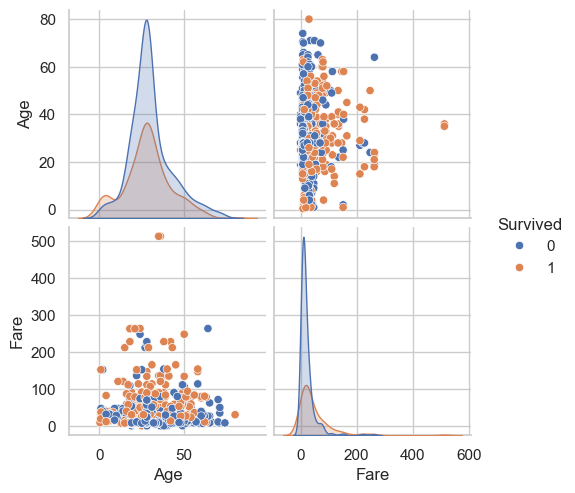

In [23]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')

#### Scatter plots and distributions for selected numerical features.

#### Observation:

Survivors cluster around higher fares and lower class (1st class).

Some survivors are children (younger age).

Non-survivors mostly in 3rd class with low fare.

##  Summary of Findings:

- Female passengers had significantly higher survival rates.
- 1st class passengers had better survival chances compared to 2nd and 3rd class.
- Younger passengers (especially children) tended to survive more.
- Fare is positively correlated with survival; those who paid more were likely in better cabins.
- `Cabin` has too many missing values to be useful without heavy preprocessing.
